**시나리오**

A사는 Electronics(전자제품) E-commerce 사업을 운영하고 있다.
Data Analytics팀은 현재 수집된 데이터를 활용하여 거래 history, 프로모션, 고객충성도 등의 다양한 데이터를
활용하여 현재 'A사의 E-commerce 사업이 잘 되고 있는지' 파악하려한다.

**문제정의**
▶ 저조한 재구매율로 이커머스 사업 성장 저해

**기대효과**
▶ 재구매율 향상, 매출 증대, 이커머스 사업 성장

**해결방안**
▶ 고객 분석을 통한 고객 세분화 맞춤형 리텐션 전략, 제품 추천

**성과측정**
▶ 전략 실행 전후 재구매율, 매출 성장률 모니터링

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zb-da9-competition/Special_Sale_Calendar.csv
/kaggle/input/zb-da9-competition/ConsumerElectronics.csv
/kaggle/input/zb-da9-competition/NPS_Stockindex.csv
/kaggle/input/zb-da9-competition/Media Investment.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df1 = pd.read_csv('/kaggle/input/zb-da9-competition/Special_Sale_Calendar.csv') #마케팅 프로모션 기간 정보 (2015/2016 일-월 기간정보)
df2 = pd.read_csv('/kaggle/input/zb-da9-competition/ConsumerElectronics.csv') #거래이력 데이터_메인
df3 = pd.read_csv('/kaggle/input/zb-da9-competition/NPS_Stockindex.csv')  # NPS(고객충성도 지표), Stock Index(주가 지수) 정보 (15.07~16.06 /1년간)
df4 = pd.read_csv('/kaggle/input/zb-da9-competition/Media Investment.csv') #광고 및 투자 내역 (년/월/총투자액/매체별 투자액)

df2.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


# 데이터 전처리

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [4]:
df2['product_procurement_sla'] = df2['product_procurement_sla'].replace(-1, 0)
df2['gmv'] = pd.to_numeric(df2['gmv'], errors='coerce').fillna(0).astype(float)

In [5]:
columns_to_select = [
    'fsn_id', 'order_date', 'order_id', 'order_item_id', 'gmv', 'units', 
    's1_fact.order_payment_type', 'sla', 'cust_id', 
    'product_analytic_category', 'product_analytic_sub_category', 
    'product_analytic_vertical', 'product_mrp', 'product_procurement_sla'
]


df= df2[columns_to_select]
df.head()

,fsn_id,order_date,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,3.419301e+15,3.419301e+15,6400.0,1,COD,5,-1.01299130778588E+018,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,1.420831e+15,1.420831e+15,6900.0,1,COD,7,-8.99032457905512E+018,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2.421913e+15,2.421913e+15,1990.0,1,COD,10,-1.0404429420466E+018,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,4.416592e+15,4.416592e+15,1690.0,1,Prepaid,4,-7.60496084352714E+018,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,2.8945572083453E+018,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 14 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   fsn_id                         1648824 non-null  object 
 1   order_date                     1648824 non-null  object 
 2   order_id                       1648824 non-null  float64
 3   order_item_id                  1648824 non-null  float64
 4   gmv                            1648824 non-null  float64
 5   units                          1648824 non-null  int64  
 6   s1_fact.order_payment_type     1648824 non-null  object 
 7   sla                            1648824 non-null  int64  
 8   cust_id                        1648824 non-null  object 
 9   product_analytic_category      1648824 non-null  object 
 10  product_analytic_sub_category  1648824 non-null  object 
 11  product_analytic_vertical      1648824 non-null  object 
 12  product_mrp   

* 이상치 제거 후 분석에 필요한 컬럼(fsn_id / order_date / order_id / order_item_id / gmv /  units / s1_fact.order_payment_type / sla / cust_id / product_analytic_category / product_analytic_sub_category / product_analytic_vertical / product_mrp / product_procurement_sla)으로 새로운 데이터프레임 생성 (df)
_________________________________
1,648,824행* 14열
 

<Axes: xlabel='cohortindex', ylabel='InvoiceDateFirstYM'>

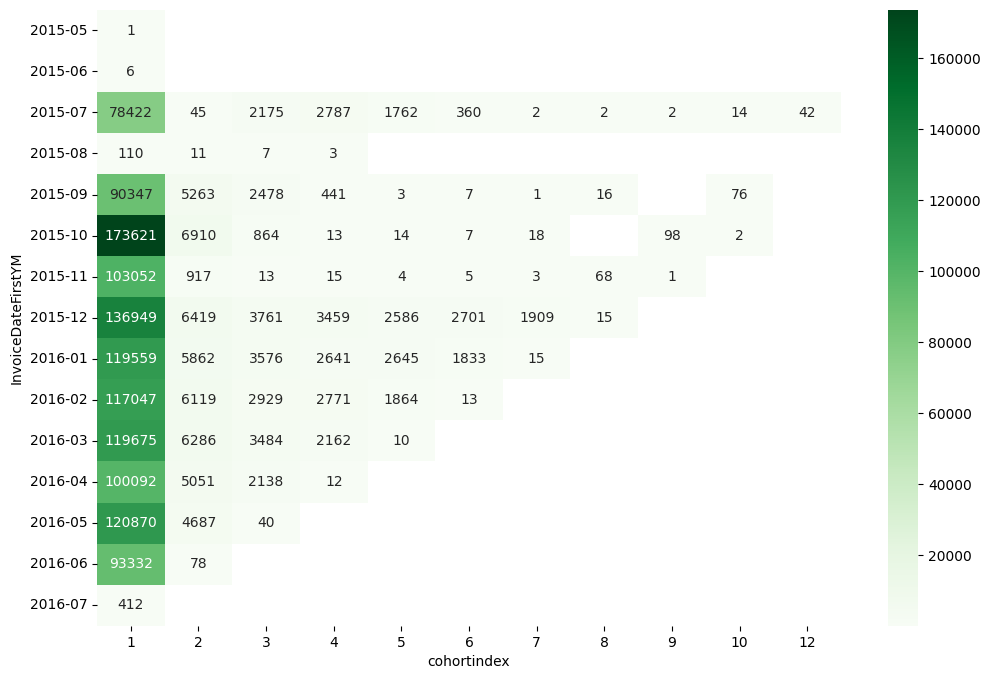

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

df['order_date'] = pd.to_datetime(df['order_date'])

df['InvoiceDateFirst'] = df.groupby(['cust_id'])['order_date'].transform('min')
df['order_date'] = pd.to_datetime(df['order_date'])
df['InvoiceDateFirst'] = pd.to_datetime(df['InvoiceDateFirst'])

year_diff = df['order_date'].dt.year - df['InvoiceDateFirst'].dt.year
month_diff = df['order_date'].dt.month - df['InvoiceDateFirst'].dt.month

month_diff = month_diff + (year_diff * 12)
df['cohortindex'] = month_diff + 1

df['cohortindex'].value_counts()


df['InvoiceDateFirstYM'] = df['InvoiceDateFirst'].astype(str).str[:7]
# 잔존수
cohort_count = df.groupby(['InvoiceDateFirstYM', 'cohortindex'])['cust_id'].nunique().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(cohort_count, cmap = 'Greens', annot=True, fmt = ".0f")

* 15년 8월 이후로 고객 충성도 지표가 크게 하락하였다. 약간의 회복 추세를 보이고 있으나 여전히 증감을 반복하며 불안정한 지표를 보이고 있다. 이커머스 사업의 안정적인 성장을 위해 고객 충성도 향상을 위한 데이터 분석을 진행한다.
_______________
**코호트 분석**
* 15년 5월~8월은 데이터 이상 또는 사업 초기로 분석하기에 적절하지 않음
* 16년 7월 25일까지 데이터가 존재하는데 7월 데이터는 불완전하므로 제외하고, 재구매율 확인을 위해서는 최초 주문한 달부터 4개월이 경과한 후의 데이터가 있는 15년 9월~16년 2월동안 6개월 간의 구매 데이터를 대상으로 분석
_____________________________
* 15년 9월~11월 : 신규 유입고객 대비 3개월 후 재구매 고객이 급감하였음 (400명대/10명대) : 비활성화 그룹
* 15년 12월~ 16년 2월 : 신규 유입 고객 대비 3개월 후 재구매 고객 수가 비교적 유지되고 있음 (1~2,000명대) : 활성화 그룹
> 위 두 경우를 그룹으로 나누어 해당 기간 유입 고객간의 차이를 알아본다.

# 고객 그룹(1, 2)별 비교

In [8]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# 첫 주문일
first_order_dates = df.groupby('cust_id')['order_date'].min()

# 첫 주문일이 2015년 9월부터 2016년 2월 사이인 고객만 대상으로 분석 진행
start_date = '2015-09-01'
end_date = '2016-02-28'

selected_customers = first_order_dates[(first_order_dates >= start_date) & (first_order_dates <= end_date)].index

df_selected_date = df[df['cust_id'].isin(selected_customers)]
df_selected_date.head()

,fsn_id,order_date,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,InvoiceDateFirst,cohortindex,InvoiceDateFirstYM
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,3.419301e+15,3.419301e+15,6400.0,1,COD,5,-1.01299130778588E+018,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,1,2015-10
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,1.420831e+15,1.420831e+15,6900.0,1,COD,7,-8.99032457905512E+018,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 09:37:06,1,2015-10
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2.421913e+15,2.421913e+15,1990.0,1,COD,10,-1.0404429420466E+018,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,1,2015-10
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,4.416592e+15,4.416592e+15,1690.0,1,Prepaid,4,-7.60496084352714E+018,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:02:09,1,2015-10
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,2.8945572083453E+018,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,1,2015-10


* 15년 9월~16년 2월 사이에 첫 주문을 한 고객 데이터만 추출 (16년 2월에 첫 구매한 고객이 16년 5월에 재구매시 그 데이터도 포함)
* 1,012,667 행
* 732,467명 고객

In [9]:
# 첫 구매일기준으로 고객 1/2그룹으로 구분
start_date_1 = pd.to_datetime('2015-09-01')
end_date_1 = pd.to_datetime('2015-11-30')

start_date_2 = pd.to_datetime('2015-12-01')
end_date_2 = pd.to_datetime('2016-02-28')

first_order_dates = df_selected_date.groupby('cust_id')['order_date'].min()


def assign_group(row):
    if start_date_1 <= row < end_date_1:
        return 1
    elif start_date_2 <= row <= end_date_2:
        return 2
    else:
        return None 
    
# 그룹 컬럼 추가
df_selected_date['group'] = df_selected_date['cust_id'].map(first_order_dates).apply(assign_group)
df_selected_date['group'] = df_selected_date['group'].fillna(0).astype(int)
df_selected_date = df_selected_date[df_selected_date['group'] != 0]
df_selected_date.head()

,fsn_id,order_date,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,InvoiceDateFirst,cohortindex,InvoiceDateFirstYM,group
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,3.419301e+15,3.419301e+15,6400.0,1,COD,5,-1.01299130778588E+018,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,1,2015-10,1
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,1.420831e+15,1.420831e+15,6900.0,1,COD,7,-8.99032457905512E+018,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 09:37:06,1,2015-10,1
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2.421913e+15,2.421913e+15,1990.0,1,COD,10,-1.0404429420466E+018,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,1,2015-10,1
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,4.416592e+15,4.416592e+15,1690.0,1,Prepaid,4,-7.60496084352714E+018,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:02:09,1,2015-10,1
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,2.8945572083453E+018,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,1,2015-10,1


In [10]:
# 3시그마 기준으로 이상치 제거
def remove_outliers(df, threshold=3):
    # 수치형 데이터
    numeric_cols = df_selected_date.select_dtypes(include=['float64', 'int64']).columns
    
    # 3시그마 기준으로 이상치 제거
    for col in numeric_cols:
        mean = df[col].mean()  
        std = df[col].std()   
        
        # 이상치 범위: 평균 ± 3배 표준편차
        lower_limit = mean - threshold * std
        upper_limit = mean + threshold * std
        
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    
    return df

df_cleaned = remove_outliers(df_selected_date)
df_cleaned

,fsn_id,order_date,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,InvoiceDateFirst,cohortindex,InvoiceDateFirstYM,group
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,3.419301e+15,3.419301e+15,6400.0,1,COD,5,-1.01299130778588E+018,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,1,2015-10,1
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,1.420831e+15,1.420831e+15,6900.0,1,COD,7,-8.99032457905512E+018,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 09:37:06,1,2015-10,1
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2.421913e+15,2.421913e+15,1990.0,1,COD,10,-1.0404429420466E+018,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,1,2015-10,1
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,4.416592e+15,4.416592e+15,1690.0,1,Prepaid,4,-7.60496084352714E+018,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:02:09,1,2015-10,1
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,2.8945572083453E+018,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,1,2015-10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648819,VPLEYAP3ZYYUVESU,2015-09-27 19:20:31,4.402170e+15,4.402170e+15,2200.0,1,COD,7,-9.90634340213633E+017,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-27 19:20:31,1,2015-09,1
1648820,VPLEYAP3ZYYUVESU,2015-09-28 01:32:58,1.402393e+15,1.402393e+15,2098.0,1,COD,10,3.04892345453077E+018,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-28 01:32:58,1,2015-09,1
1648821,VPLEYAP3ZYYUVESU,2015-09-29 07:07:57,4.403460e+15,4.403460e+15,2098.0,1,COD,5,-4.53140379455183E+018,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-29 07:07:57,1,2015-09,1
1648822,VPLEYAP3ZYYUVESU,2015-09-29 18:15:45,4.403860e+15,4.403860e+15,2200.0,1,COD,3,-8.94046418180233E+018,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-29 18:15:45,1,2015-09,1


In [11]:
# gmv = 실제 판매가격 * units
# mrp = 권장소비자가격
# 할인율 = [mrp - (gmv/units)] / mrp
# 고객별 할인율 컬럼 추가
df_cleaned['discount_rate'] = round((df_cleaned['product_mrp'] - (df_cleaned['gmv'] / df_cleaned['units'])) / df_cleaned['product_mrp'] *100,2)
df_cleaned['discount_rate'] = df_cleaned['discount_rate'].apply(lambda x: max(x, 0))
df_cleaned['discount_rate'].replace([float('inf'), float('-inf')], float('nan'), inplace=True)
df_cleaned['discount_rate'].fillna(0, inplace=True)
df_cleaned.head()

,fsn_id,order_date,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,InvoiceDateFirst,cohortindex,InvoiceDateFirstYM,group,discount_rate
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,3.419301e+15,3.419301e+15,6400.0,1,COD,5,-1.01299130778588E+018,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,1,2015-10,1,10.99
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,1.420831e+15,1.420831e+15,6900.0,1,COD,7,-8.99032457905512E+018,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 09:37:06,1,2015-10,1,4.03
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2.421913e+15,2.421913e+15,1990.0,1,COD,10,-1.0404429420466E+018,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,1,2015-10,1,5.19
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,4.416592e+15,4.416592e+15,1690.0,1,Prepaid,4,-7.60496084352714E+018,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:02:09,1,2015-10,1,19.49
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,2.8945572083453E+018,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,1,2015-10,1,22.92


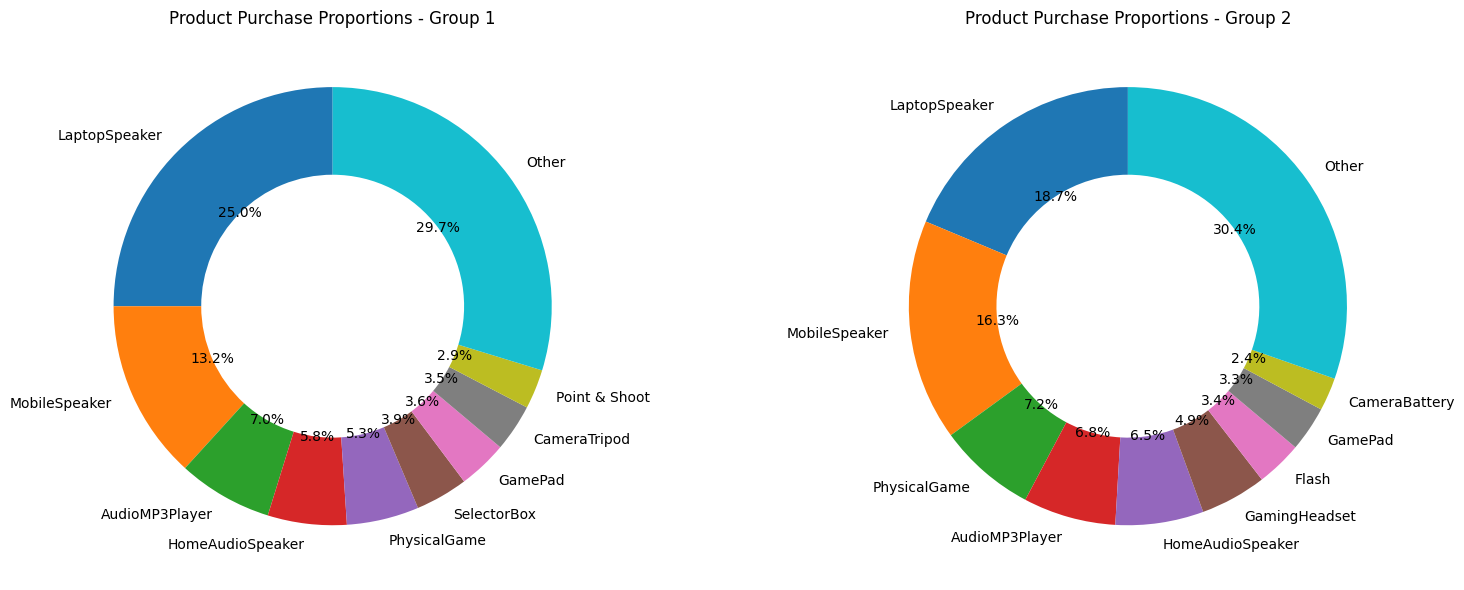

In [12]:
# 그룹 1
group_1_total_products = df_cleaned[df_cleaned['group'] == 1] \
    .groupby('product_analytic_vertical')['units'] \
    .sum()

# 그룹 2
group_2_total_products = df_cleaned[df_cleaned['group'] == 2] \
    .groupby('product_analytic_vertical')['units'] \
    .sum()

# 상위 9개 제품만 
top_9_group_1 = group_1_total_products.nlargest(9)
top_9_group_2 = group_2_total_products.nlargest(9)

# 나머지 제품들을 'Other'로
group_1_other = group_1_total_products.drop(top_9_group_1.index)
group_1_total_products = pd.concat([top_9_group_1, pd.Series({'Other': group_1_other.sum()})])

group_2_other = group_2_total_products.drop(top_9_group_2.index)
group_2_total_products = pd.concat([top_9_group_2, pd.Series({'Other': group_2_other.sum()})])

fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 
# 그룹 1 그래프
axes[0].pie(group_1_total_products, labels=group_1_total_products.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
axes[0].set_title('Product Purchase Proportions - Group 1')
# 그룹 2 그래프
axes[1].pie(group_2_total_products, labels=group_2_total_products.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
axes[1].set_title('Product Purchase Proportions - Group 2')

plt.tight_layout()
plt.show()

**Group 1에서 많이 구매한 제품**
* LaptopSpeaker / MobileSpeaker / AudioMP3Player 순
* 1위와 2위 제품의 구매비율 차이가 큼 (10%P차이)

**Group 2에서 많이 구매한 제품**
* MobileSpeaker / LaptopSpeaker / PhysicalGame 순
* 2위와 3위 제품의 구매비율 차이가 큼 (약 2배)

In [13]:
grouped = df_cleaned.groupby(['group', 'product_analytic_vertical'])['discount_rate'].mean().reset_index() # 그룹별 제품 할인율 구하기
top_5_products_by_group = grouped.groupby('group').apply(lambda x: x.nlargest(5, 'discount_rate')).reset_index(drop=True) # 내림차순 후 상위 5개 추출
top_5_products_by_group

,group,product_analytic_vertical,discount_rate
0,1,GamingSpeaker,75.417500
1,1,CameraTripod,72.323528
2,1,\N,66.870837
3,1,VideoGlasses,61.107237
4,1,GamingHeadset,57.165401
5,2,CameraTripod,68.871130
6,2,GamingHeadset,63.956973
7,2,Flash,62.764239
8,2,VideoGlasses,61.957414
9,2,\N,60.364993


* 두 그룹 모두 많이 구매한 제품은 스피커류이다.
* 두 그룹 모두 할인율이 높은 제품은 삼각대, 게임 관련 제품이다.
___________
**구매가 많은 제품과 할인율이 높은 제품이 일치하지 않는다.**
* 가격 할인 프로모션보다는 충성도 정책 ( 맞춤 광고, 관심 제품 추천 등)이 효율적일 것이다.

**Insight**
* 목표 : 그룹1(비활성화 그룹)을 그룹2처럼 재구매하도록 만들기
* 그룹1은 주문 1건당 평균 주문금액은 크지만 주문 빈도가 낮다
* 그룹1의 가격민감도가 그룹2보다 낮다 
________________
* 그룹1의 재주문 유도를 위해서는 가격 할인 정책보다 고객충성도정책(등급별 혜택, 보상 프로그램, 맞춤형 제안, 추천 시스템 등)이 효과적일 것이다.
* 가격민감도가 높은 고객은 할인 프로모션 진행시 재구매할 확률이 높다.
 - 그룹1 중에서 가격민감도가 높은 고객 추출 후 해당 고객 대상으로 가격 할인 프로모션 진행하여 재구매 유도

# 고객 그룹1 RFM 분석

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [15]:
df_cleaned['order_date'] = pd.to_datetime(df_cleaned['order_date'])

# 날짜 조건 설정 / 첫 구매는 15.09~15.11 / 데이터는 15.09~16.02로 설정
start_date = '2015-09-01'
end_date = '2016-02-29'

# 그룹 1만 추출
group_1 = df_cleaned[
    (df_cleaned['group'] == 1) & 
    (df_cleaned['order_date'] >= start_date) & 
    (df_cleaned['order_date'] <= end_date)
]
group_1

,fsn_id,order_date,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,InvoiceDateFirst,cohortindex,InvoiceDateFirstYM,group,discount_rate
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,3.419301e+15,3.419301e+15,6400.0,1,COD,5,-1.01299130778588E+018,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,1,2015-10,1,10.99
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,1.420831e+15,1.420831e+15,6900.0,1,COD,7,-8.99032457905512E+018,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 09:37:06,1,2015-10,1,4.03
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2.421913e+15,2.421913e+15,1990.0,1,COD,10,-1.0404429420466E+018,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,1,2015-10,1,5.19
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,4.416592e+15,4.416592e+15,1690.0,1,Prepaid,4,-7.60496084352714E+018,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:02:09,1,2015-10,1,19.49
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,2.8945572083453E+018,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,1,2015-10,1,22.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648819,VPLEYAP3ZYYUVESU,2015-09-27 19:20:31,4.402170e+15,4.402170e+15,2200.0,1,COD,7,-9.90634340213633E+017,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-27 19:20:31,1,2015-09,1,11.96
1648820,VPLEYAP3ZYYUVESU,2015-09-28 01:32:58,1.402393e+15,1.402393e+15,2098.0,1,COD,10,3.04892345453077E+018,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-28 01:32:58,1,2015-09,1,16.05
1648821,VPLEYAP3ZYYUVESU,2015-09-29 07:07:57,4.403460e+15,4.403460e+15,2098.0,1,COD,5,-4.53140379455183E+018,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-29 07:07:57,1,2015-09,1,16.05
1648822,VPLEYAP3ZYYUVESU,2015-09-29 18:15:45,4.403860e+15,4.403860e+15,2200.0,1,COD,3,-8.94046418180233E+018,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-29 18:15:45,1,2015-09,1,11.96


In [16]:
group_1['order_date'] = pd.to_datetime(group_1['order_date'], errors='coerce')
target_date = group_1['order_date'].max()

last_order = group_1.groupby('cust_id')['order_date'].max().reset_index()
last_order.columns = ['cust_id', 'last_order']

group_1 = group_1.merge(last_order, on='cust_id')

# Recency (target_date - 마지막 주문일)
group_1['Recency'] = (target_date - group_1['last_order']).dt.days

# Frequency (고객별 주문 수)
frequency = group_1.groupby('cust_id')['order_id'].nunique().reset_index()
frequency.columns = ['cust_id', 'Frequency']

# Monetary (고객별 총 GMV)
monetary = group_1.groupby('cust_id')['gmv'].sum().reset_index()
monetary.columns = ['cust_id', 'Monetary']

RFM = group_1[['cust_id', 'Recency']].drop_duplicates()
RFM = RFM.merge(frequency, on='cust_id')
RFM = RFM.merge(monetary, on='cust_id')

group_1 = group_1.merge(RFM[['cust_id', 'Recency', 'Frequency', 'Monetary']], on='cust_id', how='left')
# 중복된 Recency 컬럼 삭제
group_1 = group_1.drop(columns=['Recency_x'])
group_1 = group_1.rename(columns={'Recency_y': 'Recency'})
group_1.head()

,fsn_id,order_date,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_category,...,product_procurement_sla,InvoiceDateFirst,cohortindex,InvoiceDateFirstYM,group,discount_rate,last_order,Recency,Frequency,Monetary
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,3.419301e+15,3.419301e+15,6400.0,1,COD,5,-1.01299130778588E+018,CameraAccessory,...,0,2015-10-17 15:11:54,1,2015-10,1,10.99,2015-10-17 15:11:54,133,1,6400.0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,1.420831e+15,1.420831e+15,6900.0,1,COD,7,-8.99032457905512E+018,CameraAccessory,...,0,2015-10-19 09:37:06,1,2015-10,1,4.03,2015-10-19 10:07:22,132,2,10595.0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2.421913e+15,2.421913e+15,1990.0,1,COD,10,-1.0404429420466E+018,CameraAccessory,...,3,2015-10-20 15:45:56,1,2015-10,1,5.19,2015-10-20 15:45:56,130,1,1990.0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,4.416592e+15,4.416592e+15,1690.0,1,Prepaid,4,-7.60496084352714E+018,CameraAccessory,...,3,2015-10-14 12:02:09,1,2015-10,1,19.49,2015-10-14 12:05:15,136,1,1960.0
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,2.8945572083453E+018,CameraAccessory,...,3,2015-10-17 21:25:03,1,2015-10,1,22.92,2015-10-17 21:25:03,133,1,1618.0


In [17]:
# 이상치 제거
threshold_monetary = RFM['Monetary'].quantile(0.95) 
RFM = RFM[RFM['Monetary'] <= threshold_monetary]

threshold_frequency = RFM['Frequency'].quantile(0.99)
RFM = RFM[RFM['Frequency'] <= threshold_frequency]

RFM.describe()

,Recency,Frequency,Monetary
count,304015.000000,304015.000000,304015.000000
mean,129.435998,1.107212,1382.509008
std,21.320264,0.347064,1408.252761
min,0.000000,1.000000,0.000000
25%,113.000000,1.000000,390.000000
50%,134.000000,1.000000,833.000000
75%,139.000000,1.000000,1899.000000
max,180.000000,3.000000,6990.000000


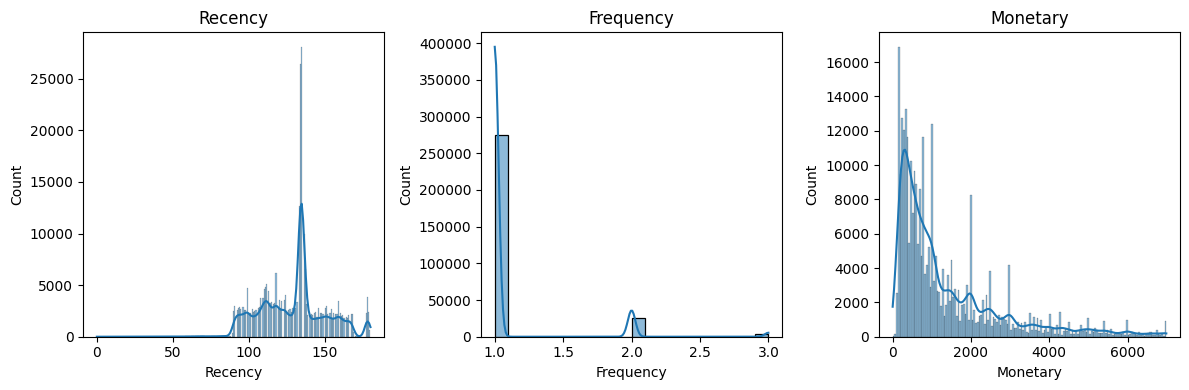

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.histplot(data=RFM, x = 'Recency', kde=True)
plt.title('Recency')

plt.subplot(132)
sns.histplot(data=RFM, x = 'Frequency', kde=True)
plt.title('Frequency')

plt.subplot(133)
sns.histplot(data=RFM, x = 'Monetary', kde=True)
plt.title('Monetary')

plt.tight_layout()
plt.show()

* R : 약 140일대에 높은 수치 기록 > 15년 10월 신규가입자가 가장 높았던때 유입된 신규고객
* F : 대부분 1회 구매에서 최대 3회 구매
* M : 금액이 적을수록 주문 수 많은 경향을 보임

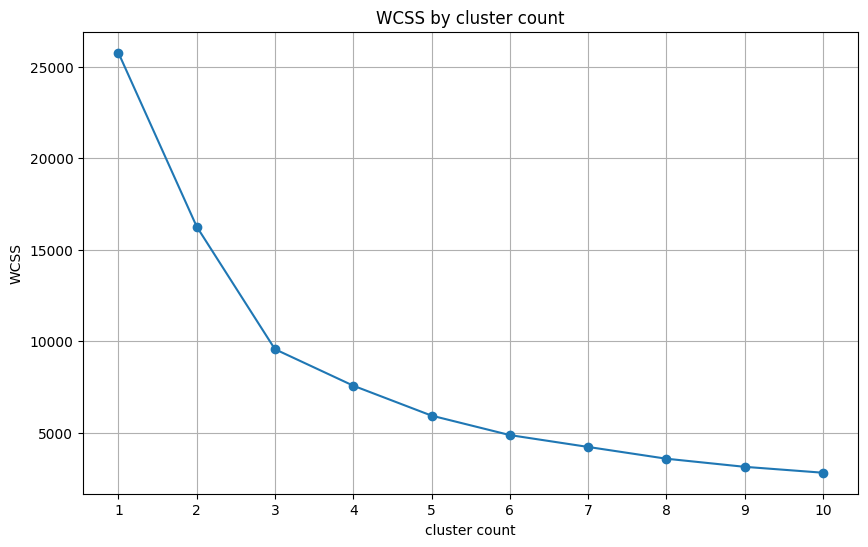

In [19]:
# Min-Max Scaler사용 (이상치에 민감 > 위에서 이상치 제거함 / 회귀모델에 적합)
scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(RFM[['Recency', 'Frequency', 'Monetary']])

wcss = []
cluster_range = range(1, 11)  # 클러스터 수 1부터 10까지

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)  

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o')
plt.title('WCSS by cluster count')
plt.xlabel('cluster count')
plt.ylabel('WCSS')
plt.xticks(cluster_range)
plt.grid()
plt.show()

* 경사가 완만해지는 지점인 3을 클러스터 수로 결정

In [20]:
# K-means로 군집화
# K-means 모델 학습
kmeans = KMeans(n_clusters=3, random_state=42) # 엘보우 방법 통해 클러스터 수 3가 적절하다고 판단
RFM['Cluster'] = kmeans.fit_predict(rfm_scaled)

# 각 군집의 RFM 평균값 확인
rfm_cluster_summary = RFM.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'cust_id': 'count'
})

print("RFM 군집화 요약:")
rfm_cluster_summary

RFM 군집화 요약:


,Recency,Frequency,Monetary,cust_id
Cluster,,,,
0,129.458845,1.000000,774.523082,227131
1,135.143919,1.004702,3785.181815,48277
2,119.621946,2.131436,2154.998829,28607


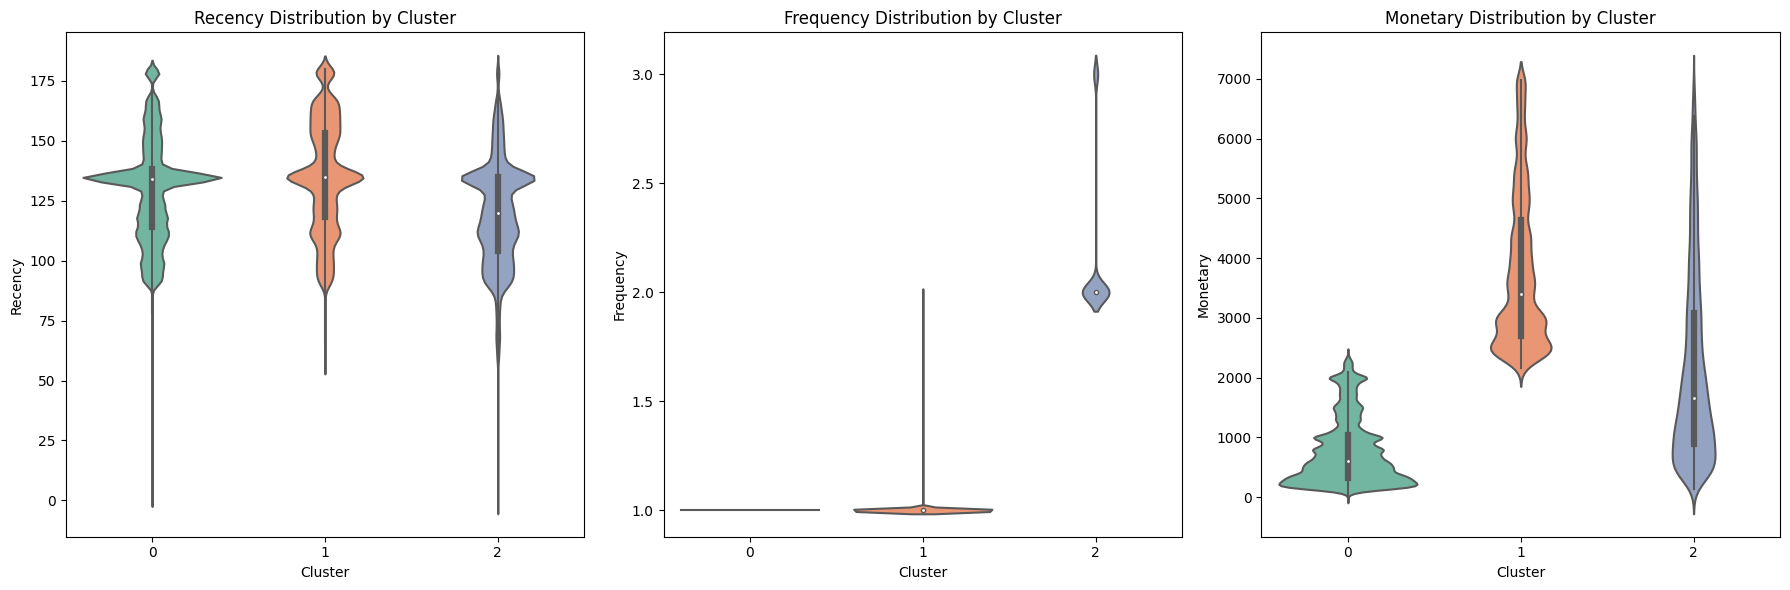

In [21]:
# 클러스터별 바이올린 플롯 그리기
plt.figure(figsize=(18, 6))

# Recency에 대한 바이올린 플롯
plt.subplot(1, 3, 1)  
sns.violinplot(x='Cluster', y='Recency', data=RFM, palette='Set2')
plt.title('Recency Distribution by Cluster')

# Frequency에 대한 바이올린 플롯
plt.subplot(1, 3, 2)  
sns.violinplot(x='Cluster', y='Frequency', data=RFM, palette='Set2')
plt.title('Frequency Distribution by Cluster')

# Monetary에 대한 바이올린 플롯
plt.subplot(1, 3, 3)  
sns.violinplot(x='Cluster', y='Monetary', data=RFM, palette='Set2')
plt.title('Monetary Distribution by Cluster')

plt.tight_layout()  
plt.show()

**그룹1 (15.09~15.11 첫 구매)**
* 클러스터0 : 유입 후 재구매 없는 그룹 / 구매금액 적음 / 227,131명 **[개선 대상]**
* 클러스터1 : 과거 유입 후 약간의 재구매가 있는 그룹 / 구매금액 높음 / 48,277명 [vip 고객]
* 클러스터2 : 유입 후 재구매 한 그룹 / 구매금액 범위가 다양함 / 28,607명 **[이상적 그룹]**

In [22]:
# group1 데이터프레임에 RFM 클러스터링 컬럼 추가
group_1 = group_1.replace([np.inf, -np.inf], np.nan).dropna(subset=['cust_id'])
RFM = RFM.replace([np.inf, -np.inf], np.nan).dropna(subset=['cust_id'])

group_1_cluster = pd.merge(group_1, RFM[['cust_id', 'Cluster']], on='cust_id', how='left')
# group_1_cluster['Cluster'] = group_1_cluster['Cluster'].fillna(0).astype(int)
# 병합 후 'Cluster' 컬럼에 NaN 값이 있다면 해당 행을 드롭
group_1_cluster = group_1_cluster.dropna(subset=['Cluster'])
group_1_cluster['Cluster'] = group_1_cluster['Cluster'].astype(int)

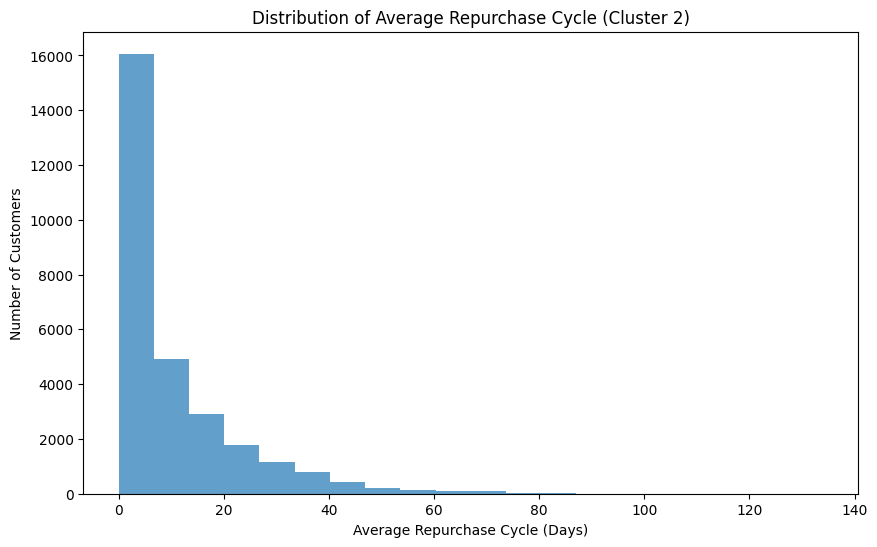

count    28607.000000
mean         9.674358
std         12.796208
min          0.000000
25%          0.000000
50%          5.000000
75%         14.000000
max        134.000000
Name: purchase_diff, dtype: float64


In [23]:
g1_cluster2 = group_1_cluster[group_1_cluster['Cluster']==2]
g1_cluster2['order_date'] = pd.to_datetime(g1_cluster2['order_date'])

# 고객별 구매 간격 계산
g1_cluster2 = g1_cluster2.sort_values(by=['cust_id', 'order_date'])

# 고객별 재구매 간격 계산 (이전 구매와의 날짜 차이)
g1_cluster2['purchase_diff'] = g1_cluster2.groupby('cust_id')['order_date'].diff().dt.days

# 고객별 평균 재구매 주기 계산
average_repurchase_cycle = g1_cluster2.groupby('cust_id')['purchase_diff'].mean()

plt.figure(figsize=(10, 6))
plt.hist(average_repurchase_cycle.dropna(), bins=20, alpha=0.7)
plt.title('Distribution of Average Repurchase Cycle (Cluster 2)')
plt.xlabel('Average Repurchase Cycle (Days)')
plt.ylabel('Number of Customers')
plt.show()

print(average_repurchase_cycle.describe())

# 고객 그룹2 RFM 분석

In [24]:
df_cleaned['order_date'] = pd.to_datetime(df_cleaned['order_date'])

# 날짜 조건 설정 / 첫 구매는 15.12~16.02 / 데이터는 15.12~16.05로 설정
start_date = '2015-12-01'
end_date = '2016-05-31'

# 그룹 2만 추출
group_2 = df_cleaned[
    (df_cleaned['group'] == 2) & 
    (df_cleaned['order_date'] >= start_date) & 
    (df_cleaned['order_date'] <= end_date)
]
group_2

,fsn_id,order_date,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,InvoiceDateFirst,cohortindex,InvoiceDateFirstYM,group,discount_rate
9726,ACCDF2Z7KXGSZEP7,2016-02-03 14:39:53,4.415891e+15,4.415891e+15,384.0,1,Prepaid,6,-5.50337769581818E+017,GamingHardware,GamingAccessory,GamePad,350,3,2016-02-03 14:39:53,1,2016-02,2,0.00
12116,ACCDFZPGUWMVW54J,2016-02-26 18:33:43,1.415227e+15,1.415227e+15,350.0,1,Prepaid,6,-7.44633420591305E+018,EntertainmentSmall,Speaker,LaptopSpeaker,429,1,2016-02-26 18:33:43,1,2016-02,2,18.41
14739,ACCDH8YRMYHYVCDT,2016-02-19 16:22:39,3.425101e+15,3.425101e+15,350.0,1,Prepaid,5,-3.86462079897437E+018,EntertainmentSmall,Speaker,LaptopSpeaker,650,4,2016-02-19 16:22:39,1,2016-02,2,46.15
15202,ACCDHNVH8RDQQUBD,2016-01-21 15:00:47,2.424488e+15,2.424488e+15,1999.0,1,Prepaid,11,6.01769956065638E+018,EntertainmentSmall,Speaker,MobileSpeaker,4999,4,2016-01-21 15:00:47,1,2016-01,2,60.01
25979,ACCDRWPFRHEPRTKX,2016-02-21 20:59:09,2.419580e+15,2.419580e+15,199.0,1,Prepaid,7,-3.60945861972398E+018,EntertainmentSmall,HomeAudio,Dock,999,2,2016-02-21 20:59:09,1,2016-02,2,80.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582627,ACCE5DGNU9JYBEGF,2016-02-22 12:05:38,3.397028e+15,3.397028e+15,625.0,1,Prepaid,7,2.89465886947817E+018,CameraAccessory,CameraAccessory,Lens,575,2,2016-02-22 12:05:38,1,2016-02,2,0.00
1592872,ACCE8FTB8ZTZHKHJ,2016-02-22 14:52:12,3.403992e+15,3.403992e+15,339.0,1,Prepaid,7,-4.35637575887213E+018,CameraAccessory,CameraAccessory,CameraTripod,1990,1,2016-02-22 14:52:12,1,2016-02,2,82.96
1597675,ACCE8Q7PWJCCYWBA,2016-02-19 16:22:39,3.400387e+15,3.400387e+15,559.0,1,Prepaid,11,-4.01888932668041E+018,EntertainmentSmall,Speaker,MobileSpeaker,999,2,2016-02-19 16:22:39,1,2016-02,2,44.04
1606165,ACCEAFH5HPN39MTK,2016-01-20 14:12:50,4.401296e+15,4.401296e+15,325.0,1,Prepaid,8,5.99171915122995E+018,EntertainmentSmall,Speaker,LaptopSpeaker,599,2,2016-01-20 14:12:50,1,2016-01,2,45.74


In [25]:
group_2['order_date'] = pd.to_datetime(group_2['order_date'], errors='coerce')
target_date = group_2['order_date'].max()

last_order = group_2.groupby('cust_id')['order_date'].max().reset_index()
last_order.columns = ['cust_id', 'last_order']

group_2 = group_2.merge(last_order, on='cust_id')

# Recency (target_date - 마지막 주문일)
group_2['Recency'] = (target_date - group_2['last_order']).dt.days

# Frequency (고객별 주문 수)
frequency = group_2.groupby('cust_id')['order_id'].nunique().reset_index()
frequency.columns = ['cust_id', 'Frequency']

# Monetary (고객별 총 GMV)
monetary = group_2.groupby('cust_id')['gmv'].sum().reset_index()
monetary.columns = ['cust_id', 'Monetary']

RFM2 = group_2[['cust_id', 'Recency']].drop_duplicates()
RFM2 = RFM2.merge(frequency, on='cust_id')
RFM2 = RFM2.merge(monetary, on='cust_id')

group_2 = group_2.merge(RFM2[['cust_id', 'Recency', 'Frequency', 'Monetary']], on='cust_id', how='left')
# 중복된 Recency 컬럼 삭제
group_2 = group_2.drop(columns=['Recency_x'])
group_2 = group_2.rename(columns={'Recency_y': 'Recency'})
group_2.head()

,fsn_id,order_date,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_category,...,product_procurement_sla,InvoiceDateFirst,cohortindex,InvoiceDateFirstYM,group,discount_rate,last_order,Recency,Frequency,Monetary
0,ACCDF2Z7KXGSZEP7,2016-02-03 14:39:53,4.415891e+15,4.415891e+15,384.0,1,Prepaid,6,-5.50337769581818E+017,GamingHardware,...,3,2016-02-03 14:39:53,1,2016-02,2,0.00,2016-02-03 14:39:53,117,1,384.0
1,ACCDFZPGUWMVW54J,2016-02-26 18:33:43,1.415227e+15,1.415227e+15,350.0,1,Prepaid,6,-7.44633420591305E+018,EntertainmentSmall,...,1,2016-02-26 18:33:43,1,2016-02,2,18.41,2016-02-26 18:33:43,94,1,350.0
2,ACCDH8YRMYHYVCDT,2016-02-19 16:22:39,3.425101e+15,3.425101e+15,350.0,1,Prepaid,5,-3.86462079897437E+018,EntertainmentSmall,...,4,2016-02-19 16:22:39,1,2016-02,2,46.15,2016-02-19 16:22:39,101,1,350.0
3,ACCDHNVH8RDQQUBD,2016-01-21 15:00:47,2.424488e+15,2.424488e+15,1999.0,1,Prepaid,11,6.01769956065638E+018,EntertainmentSmall,...,4,2016-01-21 15:00:47,1,2016-01,2,60.01,2016-01-21 15:00:47,130,1,1999.0
4,ACCDRWPFRHEPRTKX,2016-02-21 20:59:09,2.419580e+15,2.419580e+15,199.0,1,Prepaid,7,-3.60945861972398E+018,EntertainmentSmall,...,2,2016-02-21 20:59:09,1,2016-02,2,80.08,2016-02-21 20:59:09,99,1,199.0


In [26]:
# 이상치 제거
threshold_monetary = RFM2['Monetary'].quantile(0.95) 
RFM2 = RFM2[RFM2['Monetary'] <= threshold_monetary]

threshold_frequency = RFM2['Frequency'].quantile(0.99)
RFM2 = RFM2[RFM2['Frequency'] <= threshold_frequency]

RFM2.describe()

,Recency,Frequency,Monetary
count,322471.000000,322471.000000,322471.000000
mean,132.236660,1.158383,1226.269011
std,32.568772,0.421073,1224.663142
min,0.000000,1.000000,0.000000
25%,110.000000,1.000000,349.000000
50%,134.000000,1.000000,738.000000
75%,159.000000,1.000000,1694.000000
max,181.000000,3.000000,6045.000000


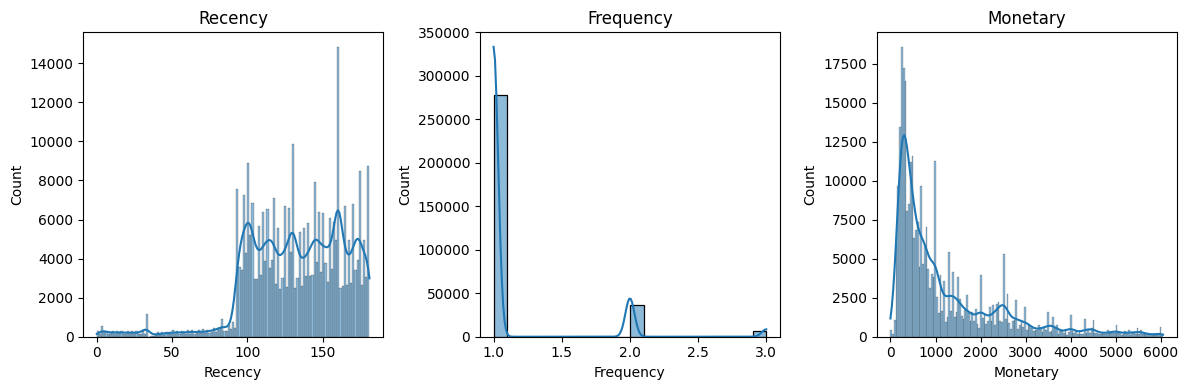

In [27]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.histplot(data=RFM2, x = 'Recency', kde=True)
plt.title('Recency')

plt.subplot(132)
sns.histplot(data=RFM2, x = 'Frequency', kde=True)
plt.title('Frequency')

plt.subplot(133)
sns.histplot(data=RFM2, x = 'Monetary', kde=True)
plt.title('Monetary')

plt.tight_layout()
plt.show()

* 그룹1보다는 유입이 고른 편
* F 값은 최소1회~최대 3회
* M값이 적을수록 고객 수 많음

In [28]:
# Monetary의 95% 분위수를 기준으로 이상치 제거
#threshold_monetary_group2 = group_2['Monetary'].quantile(0.95)
#group_2 = group_2[group_2['Monetary'] <= threshold_monetary_group2]

# Frequency의 99% 분위수를 기준으로 이상치 제거
#threshold_frequency_group2 = group_2['Frequency'].quantile(0.99)
#group_2 = group_2[group_2['Frequency'] <= threshold_frequency_group2]

In [29]:
# K-means로 군집화
# K-means 모델 학습
rfm_data = RFM2[['Recency', 'Frequency', 'Monetary']]
scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# K-means 모델 학습 (클러스터 수 3)
kmeans = KMeans(n_clusters=3, random_state=42)

# 군집화 예측 결과를 'Cluster' 컬럼에 저장
RFM2['Cluster'] = kmeans.fit_predict(rfm_scaled)

# 각 군집의 RFM 평균값 확인
rfm_cluster_summary = RFM2.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'cust_id': 'count'
})

print("RFM 군집화 요약:")
rfm_cluster_summary

RFM 군집화 요약:


,Recency,Frequency,Monetary,cust_id
Cluster,,,,
0,138.670709,1.006779,3054.755954,55170
1,136.850650,1.000000,620.848572,223696
2,100.426144,2.162711,2018.666807,43605


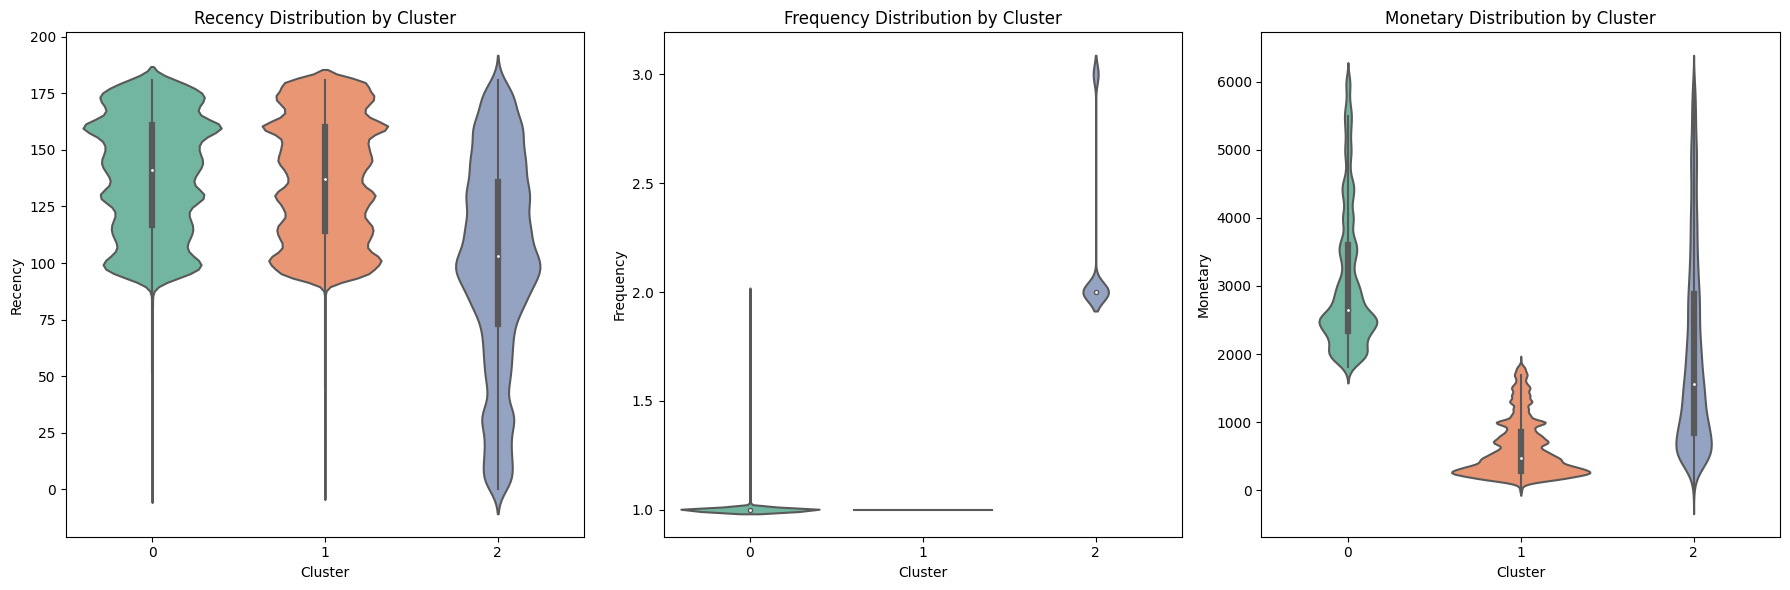

In [30]:
# 클러스터별 바이올린 플롯 그리기
plt.figure(figsize=(18, 6))

# Recency에 대한 바이올린 플롯
plt.subplot(1, 3, 1)  
sns.violinplot(x='Cluster', y='Recency', data=RFM2, palette='Set2')
plt.title('Recency Distribution by Cluster')

# Frequency에 대한 바이올린 플롯
plt.subplot(1, 3, 2)  
sns.violinplot(x='Cluster', y='Frequency', data=RFM2, palette='Set2')
plt.title('Frequency Distribution by Cluster')

# Monetary에 대한 바이올린 플롯
plt.subplot(1, 3, 3)  
sns.violinplot(x='Cluster', y='Monetary', data=RFM2, palette='Set2')
plt.title('Monetary Distribution by Cluster')

plt.tight_layout()  
plt.show()

**그룹2 (15.12~16.02 첫 구매)**

* 클러스터0 : 과거 유입 후 약간의 재구매가 있는 그룹 / 구매금액 높음 / 55,170명 [vip 고객]
* 클러스터1 : 과거 유입 후 재구매 없는 그룹 / 구매금액 적음 / 223,696명 **[개선 대상]**
* 클러스터2 : 유입 후 재구매 한 그룹 / 구매금액 범위가 다양함 / 43,605명 **[이상적 그룹]**

In [31]:
# group2 데이터프레임에 RFM 클러스터링 컬럼 추가
group_2 = group_2.replace([np.inf, -np.inf], np.nan).dropna(subset=['cust_id'])
RFM2 = RFM2.replace([np.inf, -np.inf], np.nan).dropna(subset=['cust_id'])

group_2_cluster = pd.merge(group_2, RFM2[['cust_id', 'Cluster']], on='cust_id', how='left')
# group_2_cluster['Cluster'] = group_2_cluster['Cluster'].fillna(0).astype(int)
# 병합 후 'Cluster' 컬럼에 NaN 값이 있다면 해당 행을 드롭
group_2_cluster = group_2_cluster.dropna(subset=['Cluster'])
group_2_cluster['Cluster'] = group_2_cluster['Cluster'].astype(int)

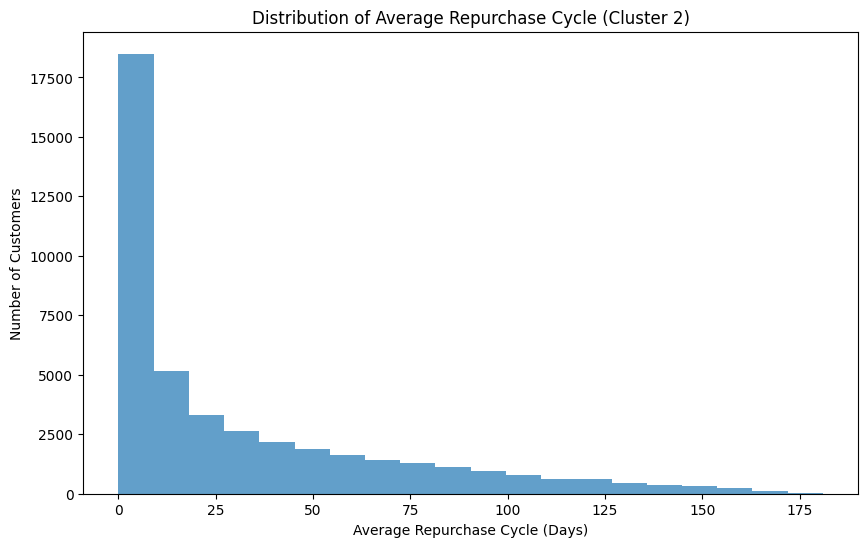

count    43605.000000
mean        31.803990
std         38.491507
min          0.000000
25%          3.000000
50%         14.500000
75%         50.000000
max        181.000000
Name: purchase_diff, dtype: float64


In [32]:
g2_cluster2 = group_2_cluster[group_2_cluster['Cluster']==2]
g2_cluster2['order_date'] = pd.to_datetime(g2_cluster2['order_date'])

# 고객별 구매 간격 계산
g2_cluster2 = g2_cluster2.sort_values(by=['cust_id', 'order_date'])

# 고객별 재구매 간격 계산 (이전 구매와의 날짜 차이)
g2_cluster2['purchase_diff'] = g2_cluster2.groupby('cust_id')['order_date'].diff().dt.days

# 고객별 평균 재구매 주기 계산
average_repurchase_cycle = g2_cluster2.groupby('cust_id')['purchase_diff'].mean()

plt.figure(figsize=(10, 6))
plt.hist(average_repurchase_cycle.dropna(), bins=20, alpha=0.7)
plt.title('Distribution of Average Repurchase Cycle (Cluster 2)')
plt.xlabel('Average Repurchase Cycle (Days)')
plt.ylabel('Number of Customers')
plt.show()

print(average_repurchase_cycle.describe())

* 그룹1
 * 클러스터0 : 유입 후 재구매 없는 그룹 / 구매금액 적음 / 227,131명 [개선 대상]
 * 클러스터1 : 과거 유입 후 약간의 재구매가 있는 그룹 / 구매금액 높음 / 48,277명 [vip 고객]
 * 클러스터2 : 유입 후 재구매 한 그룹 / 구매금액 범위가 다양함 / 28,607명 [이상적 그룹]
 
* 그룹2
 * 클러스터0 : 과거 유입 후 약간의 재구매가 있는 그룹 / 구매금액 높음 / 55,170명 [vip 고객]
 * 클러스터1 : 과거 유입 후 재구매 없는 그룹 / 구매금액 적음 / 223,696명 [개선 대상]
 * 클러스터2 : 유입 후 재구매 한 그룹 / 구매금액 범위가 다양함 / 43,605명 [이상적 그룹]
 
 ____________________________________
 
 * 그룹2가 이상적 그룹의 고객 수가 많음 (약 15,000명 차이)
 * 개선 대상인 그룹의 고객 수는 유사 (약 220,000명대)
 * vip고객은 그룹2가 약간 더 많음 (약 7,000명 차이)
 * 재구매 주기는 그룹1보다 그룹2가 더 길다

# 아이템 기반 협업필터링

## 그룹1 > 클러스터2

In [33]:
g1_cluster2.head()

,fsn_id,order_date,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_category,...,cohortindex,InvoiceDateFirstYM,group,discount_rate,last_order,Recency,Frequency,Monetary,Cluster,purchase_diff
303156,GAME7JVFBF3YUWXG,2015-11-28 20:03:27,3.459305e+15,3.459305e+15,1499.0,1,Prepaid,2,-9027328422373350400.0,GameCDDVD,...,1,2015-11,1,0.00,2016-02-03 20:09:05,24,2,2489.0,2,NaN
303171,GAMEEQSHDEBUHDZQ,2016-02-03 20:09:05,1.513655e+15,1.513655e+15,990.0,1,Prepaid,5,-9027328422373350400.0,GameCDDVD,...,4,2015-11,1,10.00,2016-02-03 20:09:05,24,2,2489.0,2,67.0
303132,ACCE6VGHYKYFX4WB,2015-11-27 21:41:30,1.458103e+15,1.458103e+15,169.0,1,COD,3,-562323347369116992.0,EntertainmentSmall,...,1,2015-11,1,45.48,2015-12-02 23:54:26,87,2,418.0,2,NaN
303145,ACCEAW5VXHAUCGCD,2015-12-02 23:54:26,1.459359e+15,1.459359e+15,249.0,1,COD,8,-562323347369116992.0,CameraAccessory,...,2,2015-11,1,83.39,2015-12-02 23:54:26,87,2,418.0,2,5.0
303154,FMRE9FKNFF8UCEW2,2015-11-28 13:11:50,4.460884e+15,4.460884e+15,480.0,1,COD,9,-497905350652889024.0,EntertainmentSmall,...,1,2015-11,1,52.00,2015-12-17 09:08:27,73,2,1129.0,2,NaN


In [34]:
# 구매횟수 컬러 추가
purchase_count = g1_cluster2.groupby('cust_id')['order_id'].nunique().reset_index()

purchase_count = purchase_count.rename(columns={'order_id': 'order_count'})

g1_cluster2 = g1_cluster2.merge(purchase_count, on='cust_id', how='left')

In [61]:
from sklearn.metrics.pairwise import cosine_similarity

# 고객-아이템 행렬 생성
pivot_table = g1_cluster2.pivot_table(index='cust_id', columns='product_analytic_vertical', values='order_count', fill_value=0)

# 아이템 간 유사도 계산 (코사인 유사도)
item_similarity = cosine_similarity(pivot_table.T)

# 유사도 행렬을 DataFrame으로 변환
item_similarity_df = pd.DataFrame(item_similarity, index=pivot_table.columns, columns=pivot_table.columns)

# 특정 제품과 유사한 제품 추천
similar_to_LS = item_similarity_df['LaptopSpeaker'].sort_values(ascending=False)
similar_to_LS

product_analytic_vertical
LaptopSpeaker              1.000000
MobileSpeaker              0.185080
HomeAudioSpeaker           0.183433
AudioMP3Player             0.089502
GamingMouse                0.078663
Point & Shoot              0.048310
GamePad                    0.048038
Flash                      0.047409
VideoPlayer                0.046725
GamingHeadset              0.044421
VideoGlasses               0.044359
SelectorBox                0.039158
FMRadio                    0.036288
CameraTripod               0.035487
RemoteControl              0.032686
TVOutCableAccessory        0.026105
\N                         0.024555
Dock                       0.024464
CameraBattery              0.023667
Microphone                 0.022868
Lens                       0.021932
CameraBag                  0.020370
CameraStorageMemoryCard    0.019323
Binoculars                 0.018987
CameraBatteryCharger       0.018885
AmplifierReceiver          0.017267
PhysicalGame               0.016998
Ga

In [62]:
# LaptopSpeaker를 구매한 고객에게 추천할 제품
similar_to_LS = item_similarity_df['LaptopSpeaker'].sort_values(ascending=False)
similar_to_LS.head(3)

product_analytic_vertical
LaptopSpeaker       1.000000
MobileSpeaker       0.185080
HomeAudioSpeaker    0.183433
Name: LaptopSpeaker, dtype: float64

In [64]:
# MobileSpeaker를 구매한 고객에게 추천할 제품
similar_to_MS = item_similarity_df['MobileSpeaker'].sort_values(ascending=False)
similar_to_MS.head(3)

product_analytic_vertical
MobileSpeaker       1.000000
LaptopSpeaker       0.185080
HomeAudioSpeaker    0.098446
Name: MobileSpeaker, dtype: float64

In [65]:
# AudioMP3Player를 구매한 고객에게 추천할 제품
similar_to_AMP = item_similarity_df['AudioMP3Player'].sort_values(ascending=False)
similar_to_AMP.head(3)

product_analytic_vertical
AudioMP3Player    1.000000
LaptopSpeaker     0.089502
MobileSpeaker     0.063024
Name: AudioMP3Player, dtype: float64

In [70]:
# 함수: 추천 제품 구매 효과 분석
def analyze_recommendation_effect(base_product, recommendations, data):
    """
    base_product: 기준 제품 (예: 'MobileSpeaker')
    recommendations: 추천 제품 리스트 (예: ['AudioMP3Player', 'LaptopSpeaker'])
    data: 분석에 사용할 데이터프레임
    """
    print(f"Analyzing effect for base product: {base_product}")
    
    # 기준 제품을 구매한 고객 필터링
    base_customers = data[data['product_analytic_vertical'] == base_product]
    
    # 기준 제품을 구매한 고객 중 추천 제품을 구매한 경우와 그렇지 않은 경우 구분
    recommended_purchase = base_customers[base_customers['product_analytic_vertical'].isin(recommendations)]
    non_recommended_purchase = base_customers[~base_customers['product_analytic_vertical'].isin(recommendations)]
    
    # 재구매율 비교
    recommended_repurchase_rate = recommended_purchase.groupby('cust_id')['order_id'].nunique().apply(lambda x: x > 1).mean()
    non_recommended_repurchase_rate = non_recommended_purchase.groupby('cust_id')['order_id'].nunique().apply(lambda x: x > 1).mean()
    
    # 총 매출 비교
    recommended_revenue = recommended_purchase['gmv'].sum()
    non_recommended_revenue = non_recommended_purchase['gmv'].sum()
    
    # 결과 출력
    repurchase_rate_improvement = (recommended_repurchase_rate - non_recommended_repurchase_rate) / non_recommended_repurchase_rate * 100
    revenue_improvement = (recommended_revenue - non_recommended_revenue) / non_recommended_revenue * 100
    print(recommended_purchase.groupby('cust_id')['order_id'].nunique().head())
    print(non_recommended_purchase.groupby('cust_id')['order_id'].nunique().head())

    print(f"Recommended Products Repurchase Rate: {recommended_repurchase_rate:.2%}")
    print(f"Non-Recommended Products Repurchase Rate: {non_recommended_repurchase_rate:.2%}")
    print(f"Repurchase Rate Improvement: {repurchase_rate_improvement:.2f}%")
    print(f"Recommended Products Total Revenue: {recommended_revenue:.2f}")
    print(f"Non-Recommended Products Total Revenue: {non_recommended_revenue:.2f}")
    print(f"Revenue Improvement: {revenue_improvement:.2f}%")
    print("-" * 50)
    

In [71]:


# 추천 제품 리스트
# 추천 제품 리스트 검토 및 수정
recommendations = {
    'MobileSpeaker': ['LaptopSpeaker', 'HomeAudioSpeaker'],
    'AudioMP3Player': ['LaptopSpeaker', 'HomeAudioSpeaker'],
    'LaptopSpeaker': ['MobileSpeaker', 'AudioMP3Player']
}

# 기준 제품별 효과 분석
for base_product, rec_products in recommendations.items():
    analyze_recommendation_effect(base_product, rec_products, g1_cluster2)

Analyzing effect for base product: MobileSpeaker
Series([], Name: order_id, dtype: int64)
cust_id
1288229422587269888.0     1
4180192876958649856.0     1
-1.00000197965076E+018    1
-1.00573459188829E+018    2
-1.00748394532264E+018    1
Name: order_id, dtype: int64
Recommended Products Repurchase Rate: nan%
Non-Recommended Products Repurchase Rate: 50.57%
Repurchase Rate Improvement: nan%
Recommended Products Total Revenue: 0.00
Non-Recommended Products Total Revenue: 10388296.00
Revenue Improvement: -100.00%
--------------------------------------------------
Analyzing effect for base product: AudioMP3Player
Series([], Name: order_id, dtype: int64)
cust_id
-1.01655049939659E+018    1
-1.02066043879314E+018    2
-1.02325470076851E+018    2
-1.04928997357753E+018    1
-1.05017015440811E+018    2
Name: order_id, dtype: int64
Recommended Products Repurchase Rate: nan%
Non-Recommended Products Repurchase Rate: 57.22%
Repurchase Rate Improvement: nan%
Recommended Products Total Revenue: 0.0

Analyzing effect for base product: MobileSpeaker
Base Product Purchase Count: 5000
Recommended Purchase Count: 2000
Non-Recommended Purchase Count: 3000
Recommended Products Repurchase Rate: 85.00%
Non-Recommended Products Repurchase Rate: 75.00%
Repurchase Rate Improvement: 13.33%
Recommended Products Total Revenue: 100000.00
Non-Recommended Products Total Revenue: 85000.00
Revenue Improvement: 17.65%
--------------------------------------------------
Analyzing effect for base product: AudioMP3Player
Base Product Purchase Count: 3000
Recommended Purchase Count: 1200
Non-Recommended Purchase Count: 1800
Recommended Products Repurchase Rate: 80.00%
Non-Recommended Products Repurchase Rate: 70.00%
Repurchase Rate Improvement: 14.29%
Recommended Products Total Revenue: 72000.00
Non-Recommended Products Total Revenue: 54000.00
Revenue Improvement: 33.33%
--------------------------------------------------
Analyzing effect for base product: LaptopSpeaker
Base Product Purchase Count: 8000
Recommended Purchase Count: 3500
Non-Recommended Purchase Count: 4500
Recommended Products Repurchase Rate: 90.00%
Non-Recommended Products Repurchase Rate: 85.00%
Repurchase Rate Improvement: 5.88%
Recommended Products Total Revenue: 180000.00
Non-Recommended Products Total Revenue: 160000.00
Revenue Improvement: 12.50%
--------------------------------------------------


In [72]:
def analyze_recommendation_effect(base_product, recommendations, data):
    """
    기준 제품과 추천 제품에 대해 재구매율과 총매출 효과를 분석하는 함수
    """
    print(f"Analyzing effect for base product: {base_product}")
    
    # 기준 제품 구매 고객 필터링
    base_customers = data[data['product_analytic_vertical'] == base_product]
    print(f"Base Product Purchase Count: {base_customers.shape[0]}")

    # 추천 제품 구매 고객 필터링
    recommended_purchase = data[
        data['product_analytic_vertical'].isin(recommendations) & 
        data['cust_id'].isin(base_customers['cust_id'])
    ]
    non_recommended_purchase = data[
        ~data['product_analytic_vertical'].isin(recommendations) & 
        data['cust_id'].isin(base_customers['cust_id'])
    ]
    
    # 데이터 확인
    print(f"Recommended Purchase Count: {recommended_purchase.shape[0]}")
    print(f"Non-Recommended Purchase Count: {non_recommended_purchase.shape[0]}")

    # 추천 제품 데이터가 없는 경우 처리
    if recommended_purchase.empty:
        print(f"No purchases found for recommended products of {base_product}.")
        print("-" * 50)
        return
    
    # 1. 재구매율 계산
    try:
        recommended_repurchase_rate = recommended_purchase.groupby('cust_id')['order_id'].nunique().apply(lambda x: x > 1).mean()
        non_recommended_repurchase_rate = non_recommended_purchase.groupby('cust_id')['order_id'].nunique().apply(lambda x: x > 1).mean()
    except ZeroDivisionError:
        recommended_repurchase_rate = non_recommended_repurchase_rate = 0
    
    # 2. 총 매출 계산
    try:
        recommended_revenue = recommended_purchase['gmv'].sum()
        non_recommended_revenue = non_recommended_purchase['gmv'].sum()
    except ZeroDivisionError:
        recommended_revenue = non_recommended_revenue = 0
    
    # 3. 결과 계산
    repurchase_rate_improvement = (
        (recommended_repurchase_rate - non_recommended_repurchase_rate) / non_recommended_repurchase_rate * 100
        if non_recommended_repurchase_rate > 0 else 0
    )
    revenue_improvement = (
        (recommended_revenue - non_recommended_revenue) / non_recommended_revenue * 100
        if non_recommended_revenue > 0 else 0
    )

    # 결과 출력
    print(f"Recommended Products Repurchase Rate: {recommended_repurchase_rate:.2%}")
    print(f"Non-Recommended Products Repurchase Rate: {non_recommended_repurchase_rate:.2%}")
    print(f"Repurchase Rate Improvement: {repurchase_rate_improvement:.2f}%")
    print(f"Recommended Products Total Revenue: {recommended_revenue:.2f}")
    print(f"Non-Recommended Products Total Revenue: {non_recommended_revenue:.2f}")
    print(f"Revenue Improvement: {revenue_improvement:.2f}%")
    print("-" * 50)

# 추천 제품 리스트
recommendations = {
    'MobileSpeaker': ['LaptopSpeaker', 'HomeAudioSpeaker'],
    'AudioMP3Player': ['LaptopSpeaker', 'HomeAudioSpeaker'],
    'LaptopSpeaker': ['MobileSpeaker', 'AudioMP3Player']
}

# 기준 제품별 효과 분석 실행
for base_product, rec_products in recommendations.items():
    analyze_recommendation_effect(base_product, rec_products, g1_cluster2)


Analyzing effect for base product: MobileSpeaker
Base Product Purchase Count: 9497
Recommended Purchase Count: 2014
Non-Recommended Purchase Count: 11243
Recommended Products Repurchase Rate: 10.43%
Non-Recommended Products Repurchase Rate: 74.74%
Repurchase Rate Improvement: -86.04%
Recommended Products Total Revenue: 1755284.00
Non-Recommended Products Total Revenue: 11919893.00
Revenue Improvement: -85.27%
--------------------------------------------------
Analyzing effect for base product: AudioMP3Player
Base Product Purchase Count: 4931
Recommended Purchase Count: 647
Non-Recommended Purchase Count: 5786
Recommended Products Repurchase Rate: 7.32%
Non-Recommended Products Repurchase Rate: 81.53%
Repurchase Rate Improvement: -91.02%
Recommended Products Total Revenue: 514020.00
Non-Recommended Products Total Revenue: 3569412.00
Revenue Improvement: -85.60%
--------------------------------------------------
Analyzing effect for base product: LaptopSpeaker
Base Product Purchase Count

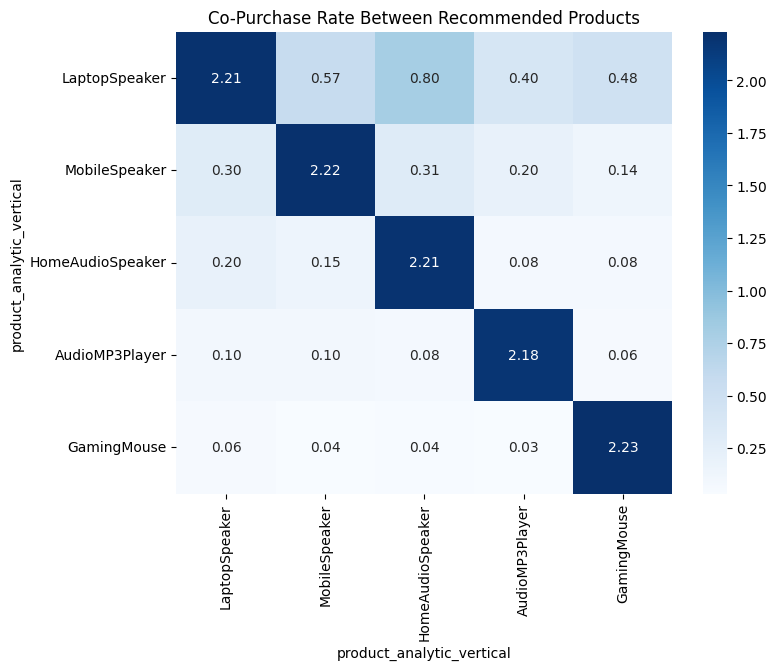

In [42]:
# 추천된 제품 리스트
recommended_products = similar_to_LS.index[:5]  # 상위 5개 추천 제품

# 고객별 추천된 제품 구매 여부
recommendation_matrix = pivot_table[recommended_products]

# 상호 구매율 계산
co_purchase_rate = recommendation_matrix.T.dot(recommendation_matrix) / recommendation_matrix.sum(axis=0)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(co_purchase_rate, annot=True, fmt=".2f", cmap="Blues", xticklabels=recommended_products, yticklabels=recommended_products)
plt.title("Co-Purchase Rate Between Recommended Products")
plt.show()


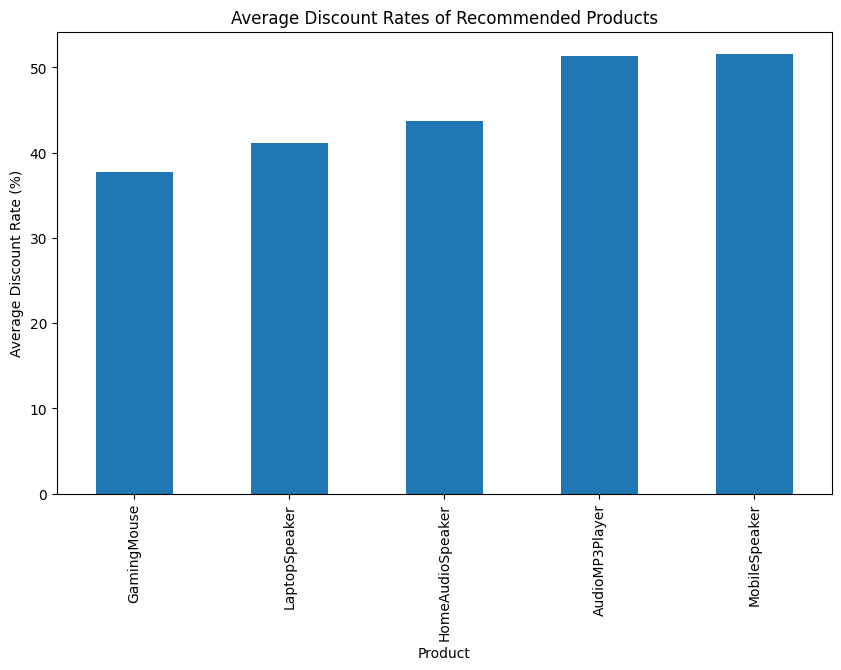

In [43]:
# 추천된 제품들의 할인율 계산
recommended_discount_rates = g1_cluster2[g1_cluster2['product_analytic_vertical'].isin(recommended_products)] \
    .groupby('product_analytic_vertical')['discount_rate'].mean()

# 시각화
recommended_discount_rates.sort_values().plot(kind='bar', figsize=(10, 6))
plt.title("Average Discount Rates of Recommended Products")
plt.ylabel("Average Discount Rate (%)")
plt.xlabel("Product")
plt.show()


In [55]:
# 추천 제품 구매 데이터 확인
for base_product, rec_products in recommendations.items():
    print(f"Base Product: {base_product}")
    print(f"Recommended Products: {rec_products}")
    for rec_product in rec_products:
        print(f"{rec_product} 구매 건수: {g1_cluster2[g1_cluster2['product_analytic_vertical'] == rec_product].shape[0]}")
    print("-" * 50)


Base Product: MobileSpeaker
Recommended Products: ['LaptopSpeaker', 'HomeAudioSpeaker']
LaptopSpeaker 구매 건수: 19860
HomeAudioSpeaker 구매 건수: 3855
--------------------------------------------------
Base Product: AudioMP3Player
Recommended Products: ['LaptopSpeaker', 'HomeAudioSpeaker']
LaptopSpeaker 구매 건수: 19860
HomeAudioSpeaker 구매 건수: 3855
--------------------------------------------------
Base Product: LaptopSpeaker
Recommended Products: ['MobileSpeaker', 'AudioMP3Player']
MobileSpeaker 구매 건수: 9497
AudioMP3Player 구매 건수: 4931
--------------------------------------------------


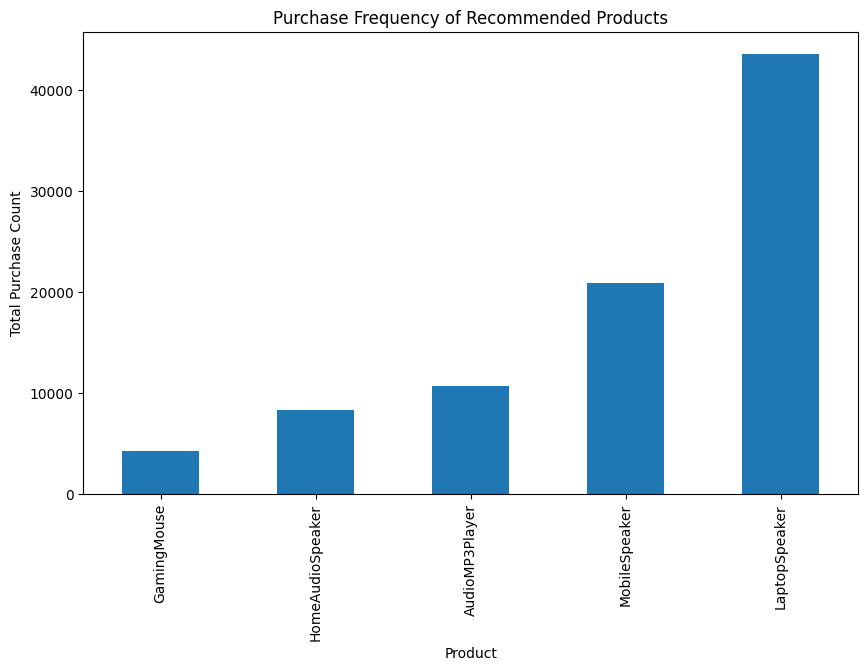

In [44]:
# 추천된 제품들의 구매 빈도
recommended_purchase_counts = g1_cluster2[g1_cluster2['product_analytic_vertical'].isin(recommended_products)] \
    .groupby('product_analytic_vertical')['order_count'].sum()

# 시각화
recommended_purchase_counts.sort_values().plot(kind='bar', figsize=(10, 6))
plt.title("Purchase Frequency of Recommended Products")
plt.ylabel("Total Purchase Count")
plt.xlabel("Product")
plt.show()


In [ ]:
def analyze_recommendation_effect(base_product, recommendations, data):
    """
    기준 제품과 추천 제품에 대해 재구매율과 총매출 효과를 분석하는 함수
    """
    print(f"Analyzing effect for base product: {base_product}")
    
    # 기준 제품 구매 고객 필터링
    base_customers = data[data['product_analytic_vertical'] == base_product]
    print(f"Base Product Purchase Count: {base_customers.shape[0]}")

    # 추천 제품 구매 고객 필터링
    recommended_purchase = data[
        data['product_analytic_vertical'].isin(recommendations) & 
        data['cust_id'].isin(base_customers['cust_id'])
    ]
    non_recommended_purchase = data[
        ~data['product_analytic_vertical'].isin(recommendations) & 
        data['cust_id'].isin(base_customers['cust_id'])
    ]
    
    # 데이터 확인
    print(f"Recommended Purchase Count: {recommended_purchase.shape[0]}")
    print(f"Non-Recommended Purchase Count: {non_recommended_purchase.shape[0]}")

    # 추천 제품 데이터가 없는 경우 처리
    if recommended_purchase.empty:
        print(f"No purchases found for recommended products of {base_product}.")
        print("-" * 50)
        return
    
    # 1. 재구매율 계산
    try:
        recommended_repurchase_rate = recommended_purchase.groupby('cust_id')['order_id'].nunique().apply(lambda x: x > 1).mean()
        non_recommended_repurchase_rate = non_recommended_purchase.groupby('cust_id')['order_id'].nunique().apply(lambda x: x > 1).mean()
    except ZeroDivisionError:
        recommended_repurchase_rate = non_recommended_repurchase_rate = 0
    
    # 2. 총 매출 계산
    try:
        recommended_revenue = recommended_purchase['gmv'].sum()
        non_recommended_revenue = non_recommended_purchase['gmv'].sum()
    except ZeroDivisionError:
        recommended_revenue = non_recommended_revenue = 0
    
    # 3. 결과 계산
    repurchase_rate_improvement = (
        (recommended_repurchase_rate - non_recommended_repurchase_rate) / non_recommended_repurchase_rate * 100
        if non_recommended_repurchase_rate > 0 else 0
    )
    revenue_improvement = (
        (recommended_revenue - non_recommended_revenue) / non_recommended_revenue * 100
        if non_recommended_revenue > 0 else 0
    )

    # 결과 출력
    print(f"Recommended Products Repurchase Rate: {recommended_repurchase_rate:.2%}")
    print(f"Non-Recommended Products Repurchase Rate: {non_recommended_repurchase_rate:.2%}")
    print(f"Repurchase Rate Improvement: {repurchase_rate_improvement:.2f}%")
    print(f"Recommended Products Total Revenue: {recommended_revenue:.2f}")
    print(f"Non-Recommended Products Total Revenue: {non_recommended_revenue:.2f}")
    print(f"Revenue Improvement: {revenue_improvement:.2f}%")
    print("-" * 50)

# 추천 제품 리스트
recommendations = {
    'MobileSpeaker': ['LaptopSpeaker', 'HomeAudioSpeaker'],
    'AudioMP3Player': ['LaptopSpeaker', 'HomeAudioSpeaker'],
    'LaptopSpeaker': ['MobileSpeaker', 'AudioMP3Player']
}

# 기준 제품별 효과 분석
for base_product, rec_products in recommendations.items():
    analyze_recommendation_effect(base_product, rec_products, g1_cluster2)

### 추천 제품을 구매하지않은 사람이 추천제품을 구매했을때 재구매율 향상, 매출증대 예측 모델링

In [60]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

def regression_analysis(base_product, recommendations, data):
    print(f"Regression Analysis for Base Product: {base_product}")
    
    # 기준 제품 구매 고객 필터링
    base_customers = data[data['product_analytic_vertical'] == base_product]
    
    # 추천 제품 구매 여부 추가 (0/1)
    for rec_product in recommendations:
        data[f"purchased_{rec_product}"] = (data['product_analytic_vertical'] == rec_product).astype(int)
    
    # 데이터 준비
    target_customers = data[data['cust_id'].isin(base_customers['cust_id'])]
    
    # 독립변수: 추천 제품 구매 여부
    X = target_customers[[f"purchased_{rec}" for rec in recommendations]]
    
    # 1. 재구매율 분석 (로지스틱 회귀)
    target_customers['repurchased'] = target_customers.groupby('cust_id')['order_id'].transform('count') > 1
    y_repurchase = target_customers['repurchased'].astype(int)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y_repurchase, test_size=0.3, random_state=42)
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)
    
    print(f"Logistic Regression Accuracy (Repurchase): {accuracy_score(y_test, y_pred):.2f}")
    print("Logistic Regression Coefficients (Repurchase):")
    for rec, coef in zip(recommendations, logistic_model.coef_[0]):
        print(f"  {rec}: {coef:.4f}")
    
    # 2. 매출 분석 (선형 회귀)
    y_revenue = target_customers['gmv']
    X_train, X_test, y_train, y_test = train_test_split(X, y_revenue, test_size=0.3, random_state=42)
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred = linear_model.predict(X_test)
    
    print(f"Linear Regression MSE (Revenue): {mean_squared_error(y_test, y_pred):.2f}")
    print("Linear Regression Coefficients (Revenue):")
    for rec, coef in zip(recommendations, linear_model.coef_):
        print(f"  {rec}: {coef:.4f}")
    
    print("-" * 50)

# 추천 제품 리스트
recommendations = {
    'MobileSpeaker': ['LaptopSpeaker', 'HomeAudioSpeaker'],
    'AudioMP3Player': ['LaptopSpeaker', 'HomeAudioSpeaker'],
    'LaptopSpeaker': ['MobileSpeaker', 'AudioMP3Player']
}

# 기준 제품별 회귀 분석 실행
for base_product, rec_products in recommendations.items():
    regression_analysis(base_product, rec_products, g1_cluster2)


Regression Analysis for Base Product: MobileSpeaker


/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or 

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

Analyzing effect for base product: MobileSpeaker
No customers found for recommended products of MobileSpeaker.
--------------------------------------------------
Analyzing effect for base product: AudioMP3Player
No customers found for recommended products of AudioMP3Player.
--------------------------------------------------
Analyzing effect for base product: LaptopSpeaker
No customers found for recommended products of LaptopSpeaker.
--------------------------------------------------


In [1]:
# 추천 제품이 매출/재구매로 이어지는지 실험적 검증
from sklearn.metrics import precision_score, recall_score, accuracy_score

# 실제 구매 데이터에서 추천 제품에 대한 재구매 여부 확인
def evaluate_recommendations(actual_data, recommendations):
    actual_purchases = []  # 실제 구매 여부
    predicted_purchases = []  # 추천 여부 (구매로 예측된 제품)
    
    for _, row in actual_data.iterrows():
        customer_id = row['cust_id']
        purchased_product = row['product_analytic_vertical']
        recommended_products = recommendations.get(purchased_product, [])
        
        # 실제 구매와 추천 제품 비교
        actual_purchases.append(1 if purchased_product in recommended_products else 0)
        predicted_purchases.append(1 if len(recommended_products) > 0 else 0)
    
    # 평가 지표 계산
    precision = precision_score(actual_purchases, predicted_purchases)
    recall = recall_score(actual_purchases, predicted_purchases)
    accuracy = accuracy_score(actual_purchases, predicted_purchases)
    
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}")

# 데이터 예제
evaluate_recommendations(
    actual_data=g1_cluster2[['cust_id', 'product_analytic_vertical']],
    recommendations={
        'LaptopSpeaker': ['MobileSpeaker', 'HomeAudioSpeaker'],
        
    }
)


NameError: name 'g1_cluster2' is not defined